Name : Khushi Mishra <br>
Roll no. : 2201321650025 <br>
Branch : CS-D

### Analysis Of HR dataset

### 1. <u> imported all the necessary libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

### 2. <u>Loaded the dataset

In [7]:

df = pd.read_csv('aug_train.csv')


In [8]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### 3. <u>extracting initital information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [10]:
print("\nMissing values before preprocessing:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))


Missing values before preprocessing:
|                        | 0    |
|:-----------------------|:-----|
| enrollee_id            | 0    |
| city                   | 0    |
| city_development_index | 0    |
| gender                 | 4508 |
| relevent_experience    | 0    |
| enrolled_university    | 386  |
| education_level        | 460  |
| major_discipline       | 2813 |
| experience             | 65   |
| company_size           | 5938 |
| company_type           | 6140 |
| last_new_job           | 423  |
| training_hours         | 0    |
| target                 | 0    |


In [11]:
print("\nNumber of duplicate rows before preprocessing:")
print(df.duplicated().sum())



Number of duplicate rows before preprocessing:
0


# -> Preprocessing

#### <u> -> Conversion of Datatype

In [12]:
numerical_cols = ['city_development_index', 'training_hours', 'target']
df['city_development_index'] = pd.to_numeric(df['city_development_index'], errors='coerce')
df['training_hours'] = pd.to_numeric(df['training_hours'], errors='coerce')
df['target'] = pd.to_numeric(df['target'], errors='coerce')


- Ensured that all are numerical cols are of numeric datatype

### -> filling numerical missing values with the median (robust to outliers & for less biased estimation)

In [13]:
# filling numerical missing values with the median (robust to outliers)
for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

### -> filled categorical missing values with the mode

In [14]:

categorical_cols_to_fill = ['gender', 'relevent_experience', 'enrolled_university',
                              'education_level', 'major_discipline', 'experience',
                              'company_size', 'company_type', 'last_new_job']
for col in categorical_cols_to_fill:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6676\3046098224.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


### -> Remove duplicate rows from the dataset

In [15]:

df.drop_duplicates(inplace=True)


In [16]:
print("\nMissing values before preprocessing:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))


Missing values before preprocessing:
|                        | 0   |
|:-----------------------|:----|
| enrollee_id            | 0   |
| city                   | 0   |
| city_development_index | 0   |
| gender                 | 0   |
| relevent_experience    | 0   |
| enrolled_university    | 0   |
| education_level        | 0   |
| major_discipline       | 0   |
| experience             | 0   |
| company_size           | 0   |
| company_type           | 0   |
| last_new_job           | 0   |
| training_hours         | 0   |
| target                 | 0   |


In [17]:
print("\nNumber of duplicate rows after removal:")
print(df.duplicated().sum())



Number of duplicate rows after removal:
0


In [18]:
print("\nDataset information after preprocessing:")
print(df.info())


Dataset information after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
d

# ->Descriptive & Diagnostic Analysis

In [2]:
print("\nDescriptive statistics of numerical columns:")
print(df.describe().to_markdown(numalign="left", stralign="left"))


Descriptive statistics of numerical columns:


NameError: name 'df' is not defined

In [20]:
print("\nValue counts for categorical columns:")
for col in categorical_cols_to_fill:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts().to_markdown(numalign="left", stralign="left"))


Value counts for categorical columns:

Value counts for 'gender':
| gender   | count   |
|:---------|:--------|
| Male     | 17729   |
| Female   | 1238    |
| Other    | 191     |

Value counts for 'relevent_experience':
| relevent_experience     | count   |
|:------------------------|:--------|
| Has relevent experience | 13792   |
| No relevent experience  | 5366    |

Value counts for 'enrolled_university':
| enrolled_university   | count   |
|:----------------------|:--------|
| no_enrollment         | 14203   |
| Full time course      | 3757    |
| Part time course      | 1198    |

Value counts for 'education_level':
| education_level   | count   |
|:------------------|:--------|
| Graduate          | 12058   |
| Masters           | 4361    |
| High School       | 2017    |
| Phd               | 414     |
| Primary School    | 308     |

Value counts for 'major_discipline':
| major_discipline   | count   |
|:-------------------|:--------|
| STEM               | 17305   |
| Huma

In [21]:
print("\nDistribution of 'target' variable:")
print(df['target'].value_counts().to_markdown(numalign="left", stralign="left"))



Distribution of 'target' variable:
| target   | count   |
|:---------|:--------|
| 0        | 14381   |
| 1        | 4777    |


###  visualize correlation Matrix by Heatmap

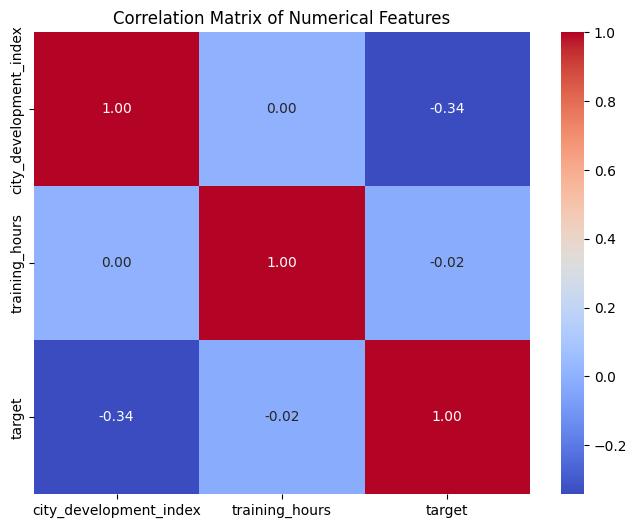

In [22]:

numerical_cols_for_corr = ['city_development_index', 'training_hours', 'target']
correlation_matrix = df[numerical_cols_for_corr].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('aug_train_correlation_heatmap.png')
plt.show()
plt.close()

#### <u> -> Find Outliers 


Number of outliers in 'city_development_index': 17


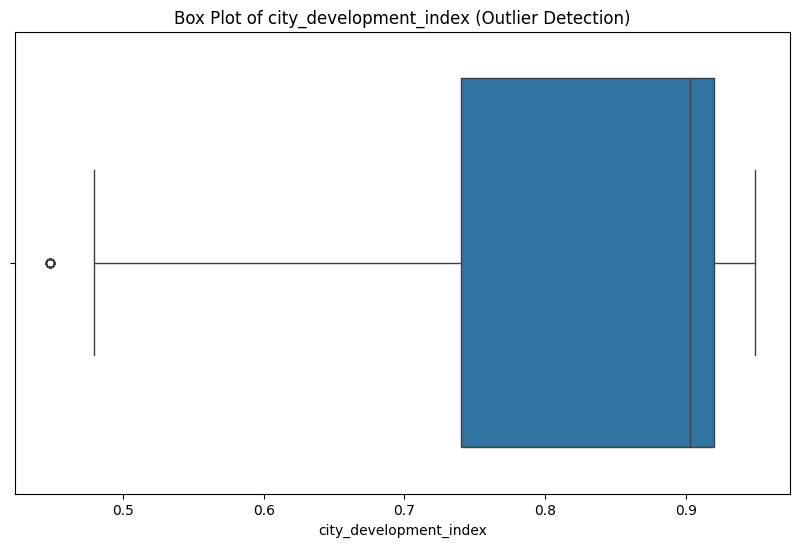


Number of outliers in 'training_hours': 984


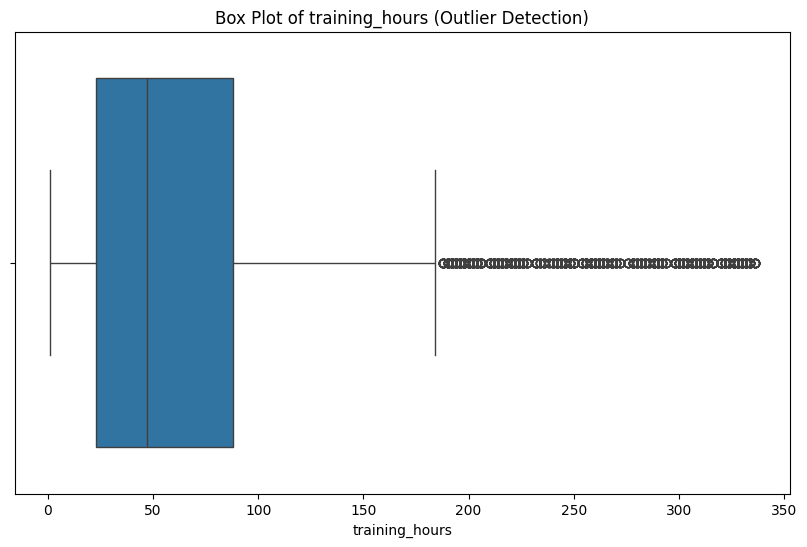

In [23]:
# Identify outliers using IQR method for 'city_development_index', 'training_hours'
numerical_cols_for_outliers = ['city_development_index', 'training_hours']
for col in numerical_cols_for_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nNumber of outliers in '{col}': {len(outliers)}")

    # Visualize outliers using box plots
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col} (Outlier Detection)')
    plt.xlabel(col)
    plt.show()
    plt.close()

#### <u> Histplot chart

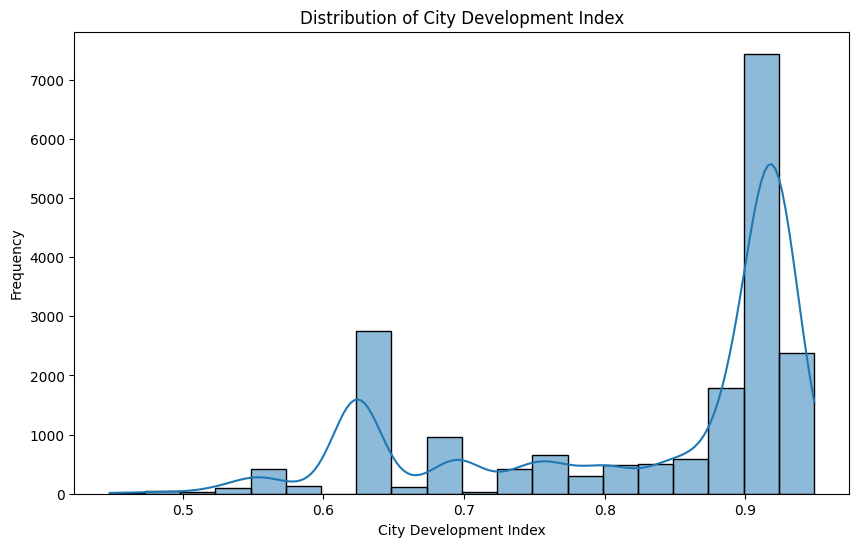

In [24]:

# Distribution of city_development_index
plt.figure(figsize=(10, 6))
sns.histplot(df['city_development_index'], bins=20, kde=True)
plt.title('Distribution of City Development Index')
plt.xlabel('City Development Index')
plt.ylabel('Frequency')
plt.show()
plt.close()

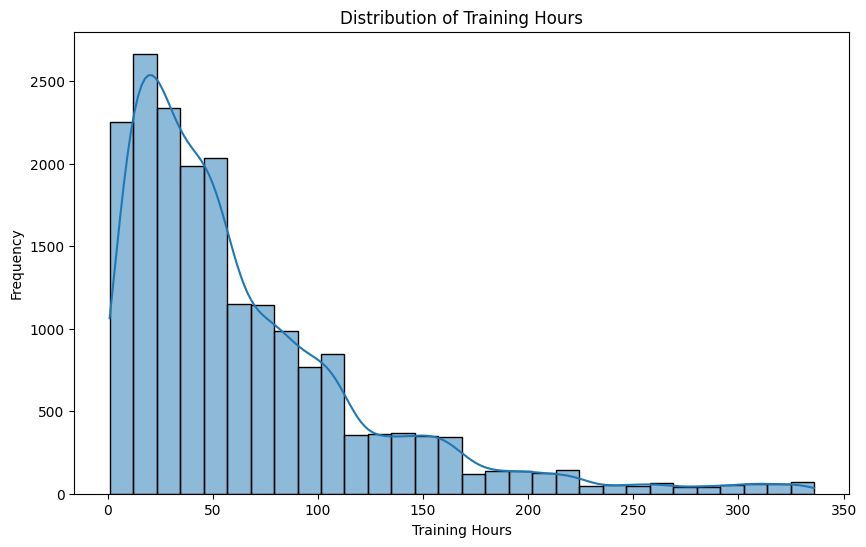

In [25]:
# Distribution of training_hours
plt.figure(figsize=(10, 6))
sns.histplot(df['training_hours'], bins=30, kde=True)
plt.title('Distribution of Training Hours')
plt.xlabel('Training Hours')
plt.ylabel('Frequency')
plt.show()
plt.close()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6676\3961929135.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


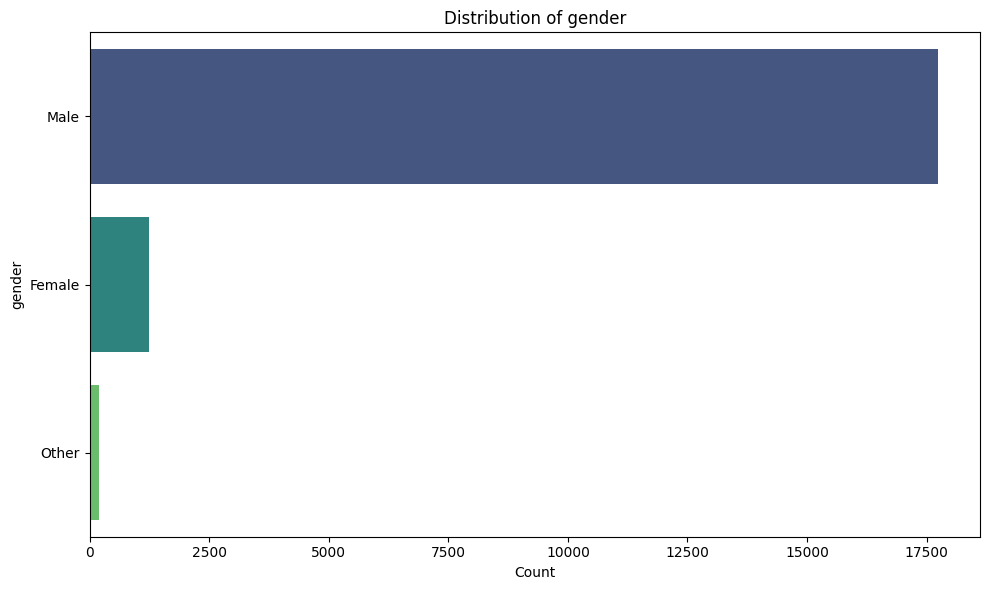

C:\Users\DELL\AppData\Local\Temp\ipykernel_6676\3961929135.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


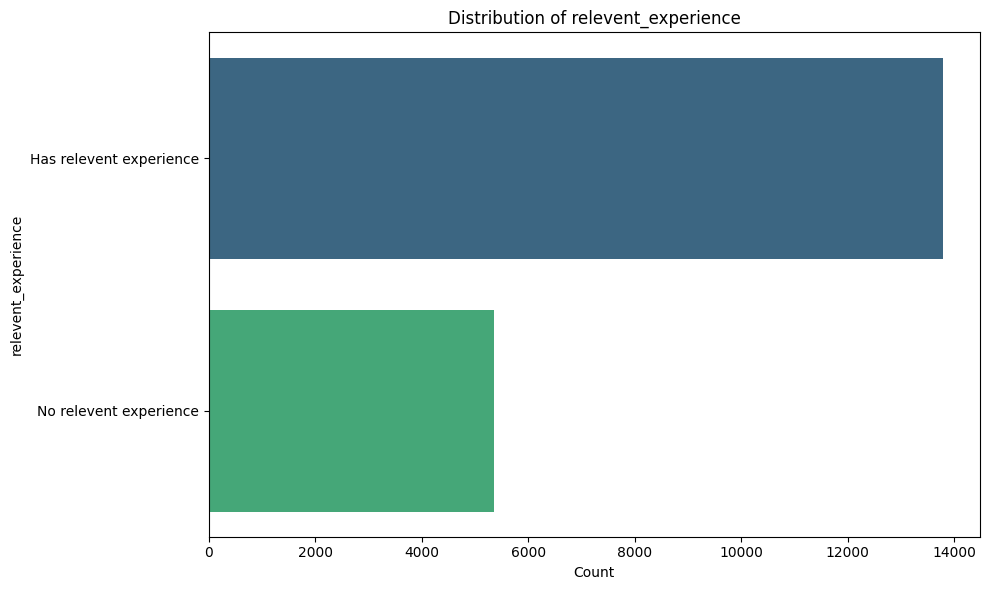

C:\Users\DELL\AppData\Local\Temp\ipykernel_6676\3961929135.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


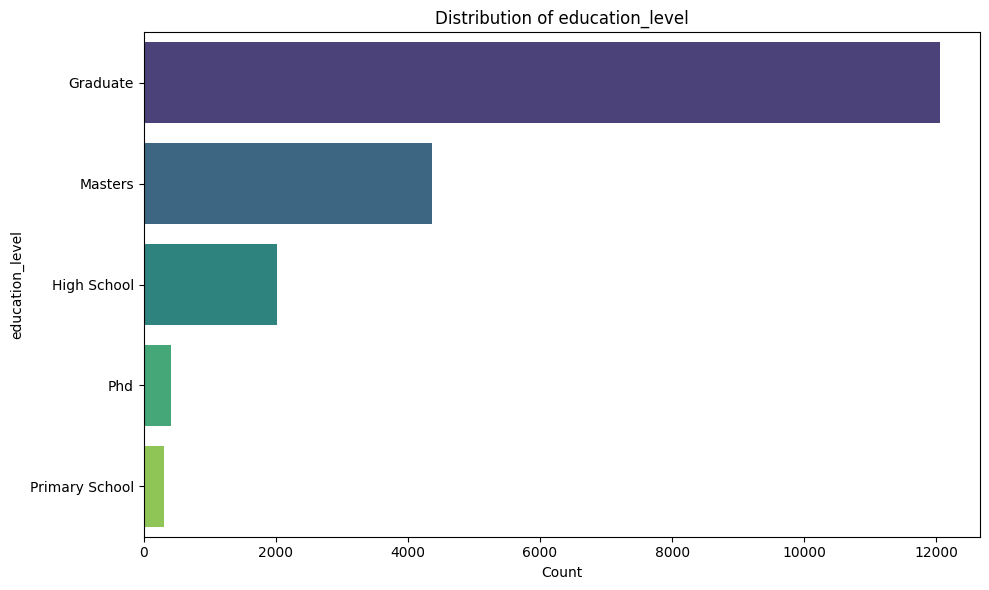

C:\Users\DELL\AppData\Local\Temp\ipykernel_6676\3961929135.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


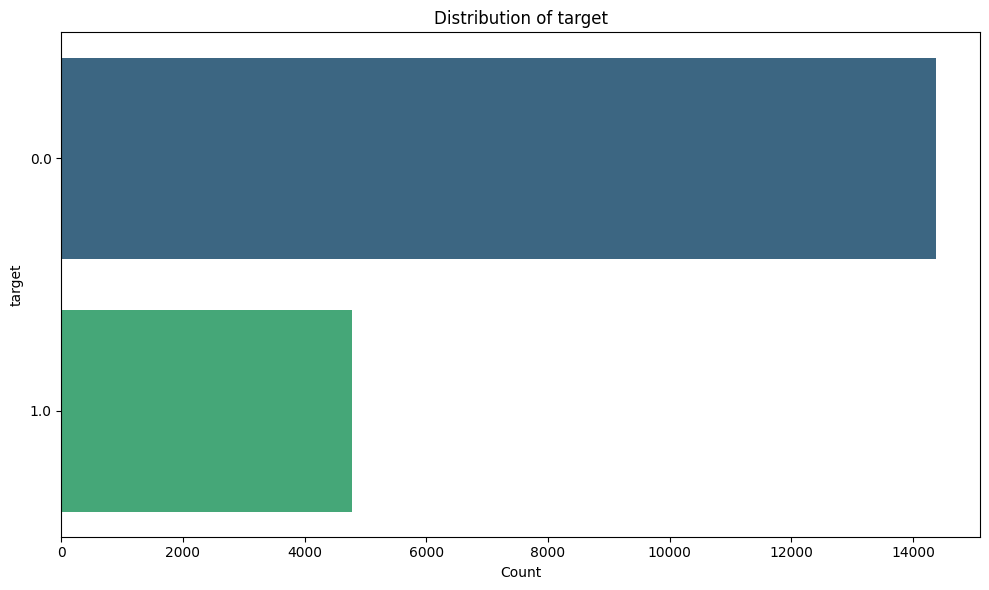

In [26]:
# Count plots for selected categorical variables
categorical_plot_cols = ['gender', 'relevent_experience','education_level', 'target'] # Adding target as it's binary categorical
for col in categorical_plot_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()
    plt.close()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6676\2409562548.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='city_development_index', data=df, palette='pastel')


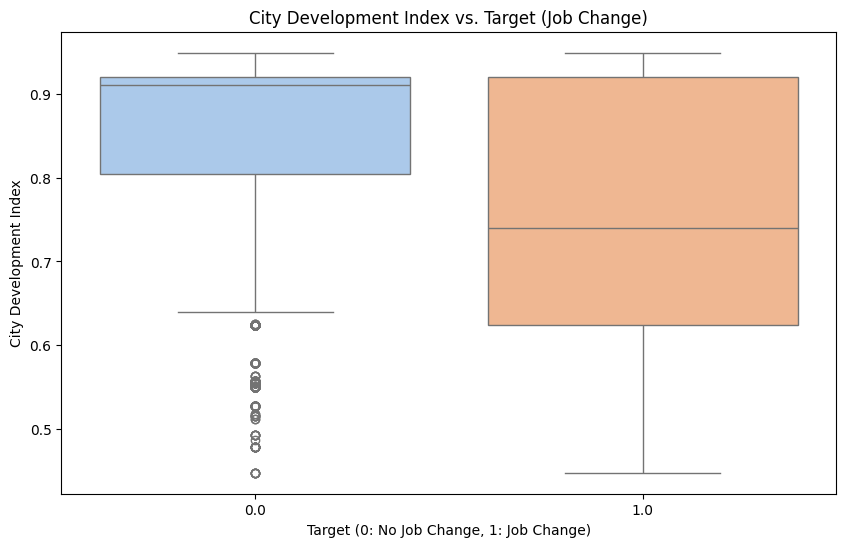

In [27]:
# Relationship between city_development_index and target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='city_development_index', data=df, palette='pastel')
plt.title('City Development Index vs. Target (Job Change)')
plt.xlabel('Target (0: No Job Change, 1: Job Change)')
plt.ylabel('City Development Index')
plt.show()
plt.close()


C:\Users\DELL\AppData\Local\Temp\ipykernel_6676\3695992789.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='training_hours', data=df, palette='pastel')


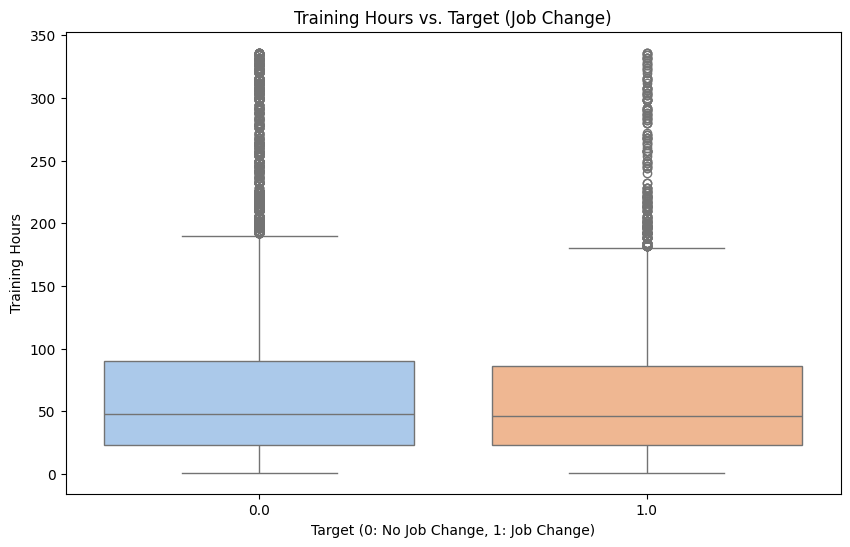

In [28]:
# Relationship between training_hours and target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='training_hours', data=df, palette='pastel')
plt.title('Training Hours vs. Target (Job Change)')
plt.xlabel('Target (0: No Job Change, 1: Job Change)')
plt.ylabel('Training Hours')
plt.show()
plt.close()

In [29]:
df['experience']=df['experience'].replace({'>20':21,'<1':0})
df['last_new_job']=df['last_new_job'].replace({'>4':5,'never':0})

In [30]:
exp=df['experience'].unique()
print(exp)
lnj=df['last_new_job'].unique()
print(lnj)

[21 '15' '5' 0 '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18' '19'
 '12' '3' '6' '9' '8' '20']
['1' 5 0 '4' '3' '2']


#### <u> Question 1 - What experience group is most likely to look for a new job? 

In [31]:
 df.groupby('experience')['target'].mean()*100

experience
0     45.402299
21    15.696807
1     42.440801
10    21.015228
11    22.740964
12    18.623482
13    19.298246
14    18.259386
15    16.618076
16    14.173228
17    16.666667
18    15.357143
19    17.434211
2     33.185448
20    22.297297
3     35.302806
4     32.573058
5     28.811189
6     28.207237
7     29.474708
8     24.314214
9     21.734694
Name: target, dtype: float64

#### <u> Question 2- Which education level is most common among job seekers? 

In [32]:
df[df['target']==1.0]['education_level'].value_counts()

education_level
Graduate          3349
Masters            935
High School        394
Phd                 58
Primary School      41
Name: count, dtype: int64

#### <u> Question 3- Do candidates with relevant experience have more training hours? 

Average training hours by relevant experience group:
| relevent_experience     | training_hours   |
|:------------------------|:-----------------|
| Has relevent experience | 65.8002          |
| No relevent experience  | 64.2533          |

Candidates with 'Has relevent experience' have an average of 65.80 training hours.
Candidates with 'No relevent experience' have an average of 64.25 training hours.


C:\Users\DELL\AppData\Local\Temp\ipykernel_6676\1315545644.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=training_hours_by_experience.index, y=training_hours_by_experience.values, palette='coolwarm')


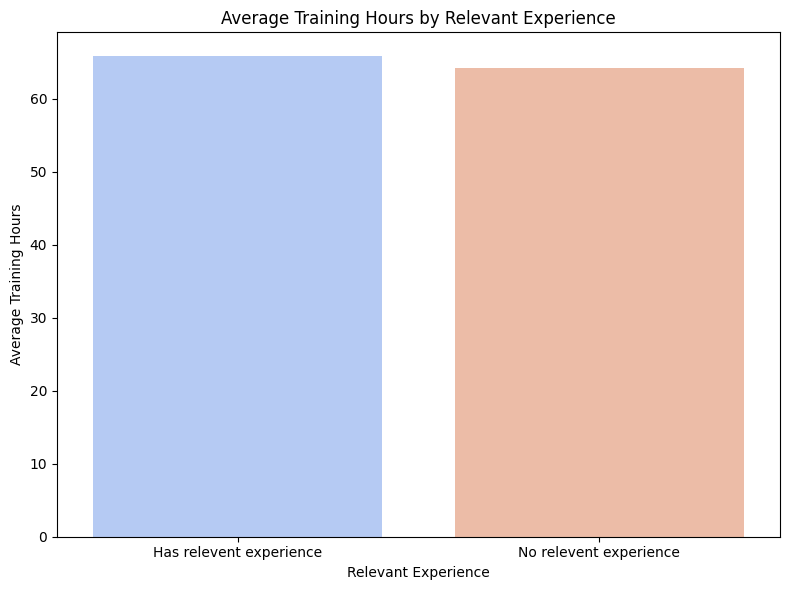

In [33]:
#df.groupby('relevent_experience')['training_hours'].max()
# Group by 'relevent_experience' and calculate the mean of 'training_hours' for each group
training_hours_by_experience = df.groupby('relevent_experience')['training_hours'].mean()

print("Average training hours by relevant experience group:")
print(training_hours_by_experience.to_markdown(numalign="left", stralign="left"))

# let's Compare the mean training hours
has_experience_hours = training_hours_by_experience.get('Has relevent experience', 0)
no_experience_hours = training_hours_by_experience.get('No relevent experience', 0)

print(f"\nCandidates with 'Has relevent experience' have an average of {has_experience_hours:.2f} training hours.")
print(f"Candidates with 'No relevent experience' have an average of {no_experience_hours:.2f} training hours.")

# Visualize the comparison using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=training_hours_by_experience.index, y=training_hours_by_experience.values, palette='coolwarm')
plt.title('Average Training Hours by Relevant Experience')
plt.xlabel('Relevant Experience')
plt.ylabel('Average Training Hours')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
plt.close()

#### <u> Question 4 - What is the average experience in years for each education level?
- <b> Ans -></b> 

Average experience (in years) by education level:
| education_level   | experience_numeric   |
|:------------------|:---------------------|
| Phd               | 16.5507              |
| Masters           | 12.1302              |
| Graduate          | 9.92428              |
| High School       | 6.52157              |
| Primary School    | 5.30519              |


C:\Users\DELL\AppData\Local\Temp\ipykernel_6676\2489314707.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_experience_by_education.index, y=average_experience_by_education.values, palette='viridis')


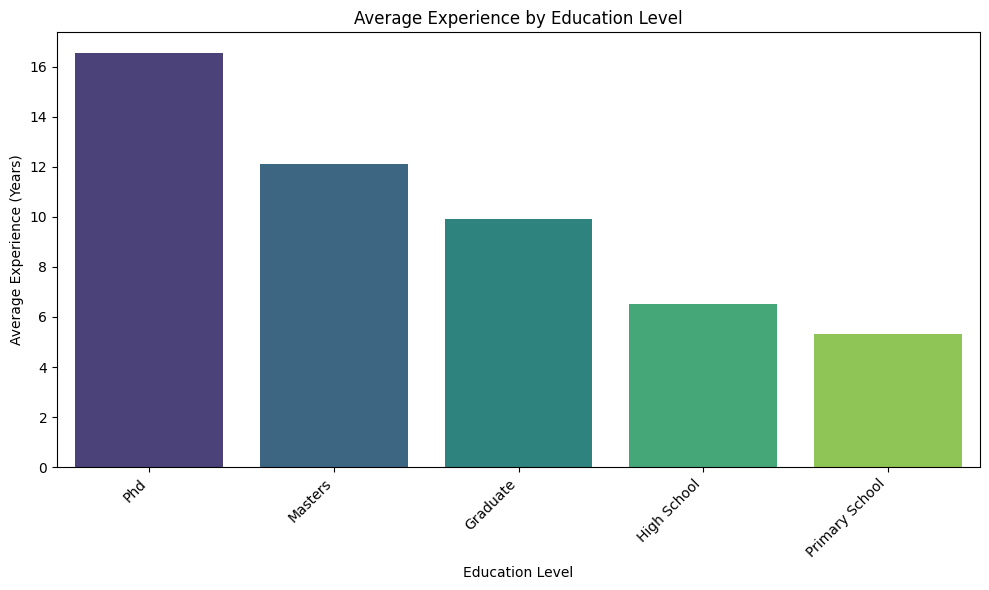

In [34]:
# Map '<1' to 0.5 and '>20' to 21 for a numerical representation
df['experience_numeric'] = df['experience'].replace({'<1': 0.5, '>20': 21}).astype(float)

average_experience_by_education = df.groupby('education_level')['experience_numeric'].mean().sort_values(ascending=False)

print("Average experience (in years) by education level:")
print(average_experience_by_education.to_markdown(numalign="left", stralign="left"))

# Visualize the average experience by education level
plt.figure(figsize=(10, 6))
sns.barplot(x=average_experience_by_education.index, y=average_experience_by_education.values, palette='viridis')
plt.title('Average Experience by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Experience (Years)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.close()


#### <u>Question 5 - Which company type has highest percentage of people waiting to switch the job?
- <b> Ans -></b> 

In [35]:
#Let's Identify the company type with the highest percentage

company_type_job_change_percentage = df.groupby('company_type')['target'].mean().sort_values(ascending=False)
print("Percentage of people waiting to switch job by company type:")
print(company_type_job_change_percentage.to_markdown(numalign="left", stralign="left"))

highest_percentage_company_type = company_type_job_change_percentage.index[0]
highest_percentage = company_type_job_change_percentage.iloc[0]


Percentage of people waiting to switch job by company type:
| company_type        | target   |
|:--------------------|:---------|
| Pvt Ltd             | 0.260638 |
| Other               | 0.239669 |
| Early Stage Startup | 0.235489 |
| Public Sector       | 0.219895 |
| NGO                 | 0.18618  |
| Funded Startup      | 0.13986  |


C:\Users\DELL\AppData\Local\Temp\ipykernel_6676\2946043146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_type_job_change_percentage.index, y=company_type_job_change_percentage.values, palette='plasma')


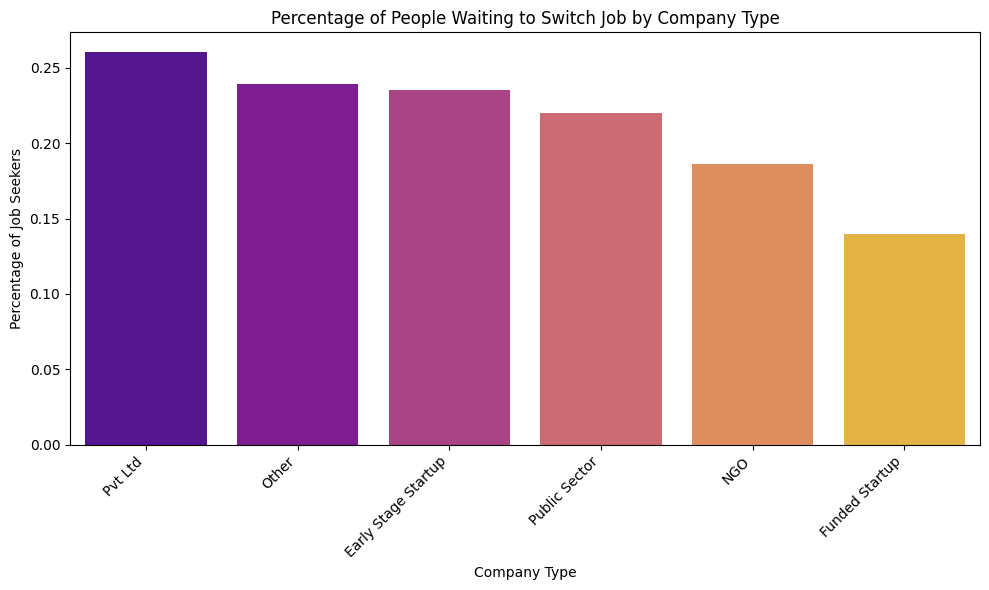

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x=company_type_job_change_percentage.index, y=company_type_job_change_percentage.values, palette='plasma')
plt.title('Percentage of People Waiting to Switch Job by Company Type')
plt.xlabel('Company Type')
plt.ylabel('Percentage of Job Seekers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.close()

In [45]:
# Encode categorical features
df = pd.get_dummies(df, drop_first=True)


# -> Predictive Modeling

In [46]:
X = df.drop('target', axis=1)
y = df['target']

#### <u> -> Data division (split data)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### <u> -> Model training & fitting

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#### <u> -> Model prediction

In [50]:
y_pred = model.predict(X_test)

#### <u> -> Confusion Matrix

In [51]:

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[2577  303]
 [ 587  365]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85      2880
         1.0       0.55      0.38      0.45       952

    accuracy                           0.77      3832
   macro avg       0.68      0.64      0.65      3832
weighted avg       0.75      0.77      0.75      3832



#### <u> ->  Feature Importance

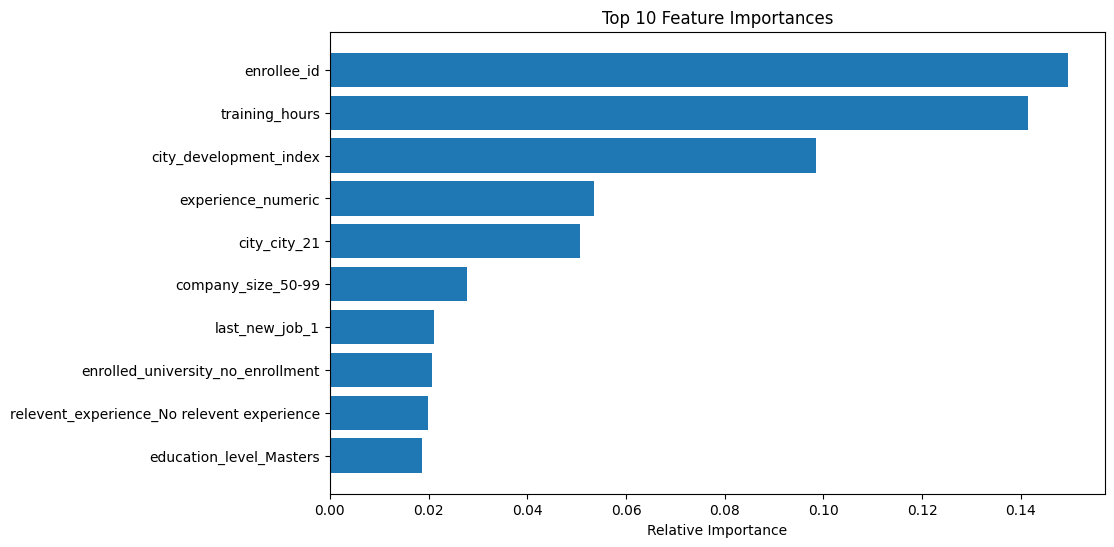

In [52]:
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# -> Prescriptive Analysis

1. **🎯 Target Candidates with STEM Backgrounds**
Insight: Most individuals who are likely to change jobs come from STEM disciplines.

- **Action:** Tailor job campaigns and recruitment incentives specifically toward STEM candidates. Highlight career growth, innovation opportunities, and skill development.

2. **📊 Prioritize Candidates with 5–10 Years Experience**
Insight: Candidates with moderate experience (5–10 years) showed higher likelihood of switching jobs than freshers or very experienced professionals.

- **Action:** Offer mid-career transition programs, leadership paths, or flexible roles to attract this group.

3. **📉 Address Employee Retention in Small Companies**
Insight: Candidates from small companies (10–99 employees) are more prone to job changes.

- **Action:** If you're a small organization, focus on employee engagement, perks, and career development to reduce attrition.

4. **🕓 Recent Job Joiners Less Likely to Leave**
Insight: People who recently changed jobs (within a year) are less likely to seek another change.

- **Action:**  Don’t over-target recent joiners. Focus outreach on employees who’ve been in the same job for 2+ years.

5. **👨‍🎓 Tailor Offers by Education Level**
Insight: Candidates with Graduate-level education dominate the sample and often explore new jobs.

- **Action:** Design entry- to mid-level roles or reskilling programs for graduates; include upskilling incentives like sponsored certifications.

6. **📚 Offer More Training Hours for Retention**
Insight: Higher training hours correlate with lower likelihood of switching jobs.

- **Action:** Increase training and development programs — employees who feel invested in are more likely to stay.

7. **🧑‍💻 No-Relevant Experience Workers Are High Risk**
Insight: Individuals without prior relevant experience are more likely to look for new jobs.

- **Action:** If hiring such candidates, offer mentorship and clear onboarding to increase retention.

8. **💡 Use Model Predictions for Proactive Retention**
Insight: The predictive model (Random Forest) identifies who is likely to leave with good accuracy.

- **Action:** Use the model internally to flag high-risk employees. Conduct personalized interviews, satisfaction surveys, or retention interventions.